## Sparse Reconstruction with $l_1$-penalty:

In [15]:
import numpy as np
import numpy.random as rand
import numpy.linalg as la
import matplotlib.pyplot as plt


%matplotlib inline

##### Helpers

In [34]:
def sqnorm(x):
    return np.dot(x,x)

def soft_threshold(x, soft_thres):
    return np.sign(x) * np.maximum(np.abs(x) - soft_thres, 0)

## Lasso:

$$\min_{\alpha \in \mathbf{R}^P} \frac{1}{2}||x - D \alpha||_2^2 + \lambda ||\alpha||_1$$

#### Coordinate Descent Algorithm

In [37]:
def get_next_idx_cycle(D, x, p):
    def f(i):
        return (i + 1) % p
    return f

def get_next_idx_uniform(D, x, p):
    def f(i):
        return rand.randint(0,p-1)
    return f

def get_next_idx_orthog_projection(D, x, p):
    return i

idx_iterators = {'cycle':get_next_idx_cycle}

def coordinate_descent(D, x, lmbda, T=100, alpha=None,select='cycle'):
    '''
    Parameters:
        x     - input vector
        D     - dictionary
        lmbda - sparsity penalty
        alpha - initial alpha
        T     - # of iteration
    '''
    m, p = D.shape
    obj_values = []

    # define rules to pick next idx
    j = -1
    get_next = idx_iterators[select](D,x,p)

    if not alpha:
        alpha = np.zeros(p)
   
    for t in xrange(T):        
        j = get_next(j)
        d = D[:,j]
        alpha_update = alpha[j] + np.dot(d, x - np.dot(D, alpha)) / sqnorm(d)
        alpha[j] = soft_threshold(alpha_update, lmbda)

        obj_values.append(sqnorm(x - np.dot(D,alpha)))
        
    return alpha, obj_values
    

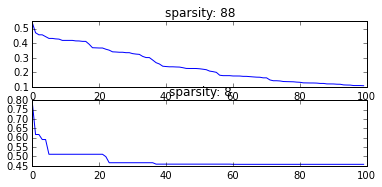

In [42]:
m = 30                     # dimension of each atom
p = 100                      # number of atoms
rand = np.random.rand
D = rand(m*p).reshape(m,p) # dictionary
x = rand(m)

# normalise by column
D = D / np.linalg.norm(D,axis=0)
x = x / np.linalg.norm(x)

alpha, obj_values = coordinate_descent(D, x, 0.01)
s = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 1)
plt.title(s)
plt.plot(np.array(obj_values))

alpha, obj_values = coordinate_descent(D, x, 0.5)
s2 = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 2)
plt.title(s2)
plt.plot(np.array(obj_values))

Again, how to pick lambda?

### Proximal Gradient Algorithm

#### Iterative Soft-Thresholding

In [44]:
def proximal_gradient(D, x, lmbda=None, mu=None, step_size=None, T=100, alpha=None):
    m, p = D.shape
    if not alpha:
        alpha = np.zeros(p)
    obj_values = []
    for t in xrange(T):
        # one step gradient descent

        ### TODO ###
        
        # solve minimisation of alpha with constraint on penalty func

        ### TODO ###
        
        continue
        
    return alpha, obj_values
        

#### Homotopy

In [47]:
def homotopy(D, x, lmbda=None, mu=None, step_size=None, T=100, alpha=None):
    m, p = D.shape
    if not alpha:
        alpha = np.zeros(p)
    obj_values = []
    for t in xrange(T):
        # one step gradient descent

        ### TODO ###
        
        # solve minimisation of alpha with constraint on penalty func

        ### TODO ###
        continue
        
    return alpha, obj_values
        